# Assignment 3: Clustering

## Viktor Olsson (10 h) and Johan Wallgren (10 h)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
#functions
# code from notebook dbscan_intro
def db_plot(data, eps, min_samples):
    data = StandardScaler().fit_transform(data)
    # Compute DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.show()

## 1. *Draw a scatter plot that shows the phi and psi combinations in the data file.*

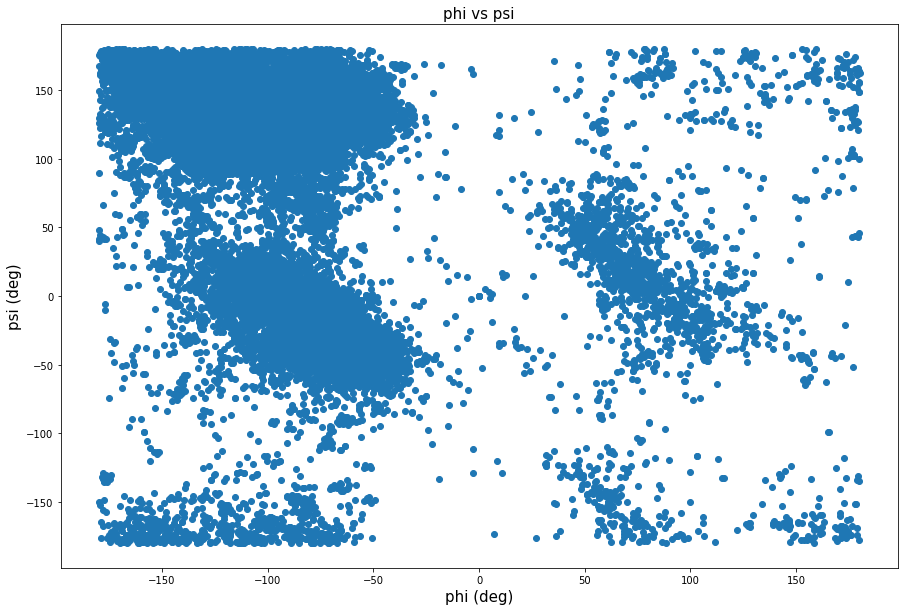

In [3]:
data = pd.read_csv('../../datasets/data_all.csv')
data = data.dropna(how='all')
plt.figure(figsize=(15, 10))
plt.scatter(data['phi'],data['psi'])
plt.title('phi vs psi', fontsize = 15)
plt.xlabel('phi (deg)', fontsize = 15)
plt.ylabel('psi (deg)', fontsize = 15)
plt.show()

## 2. *Use K-means to cluster phi and psi*

### 2a. *Finding an appropriate K*

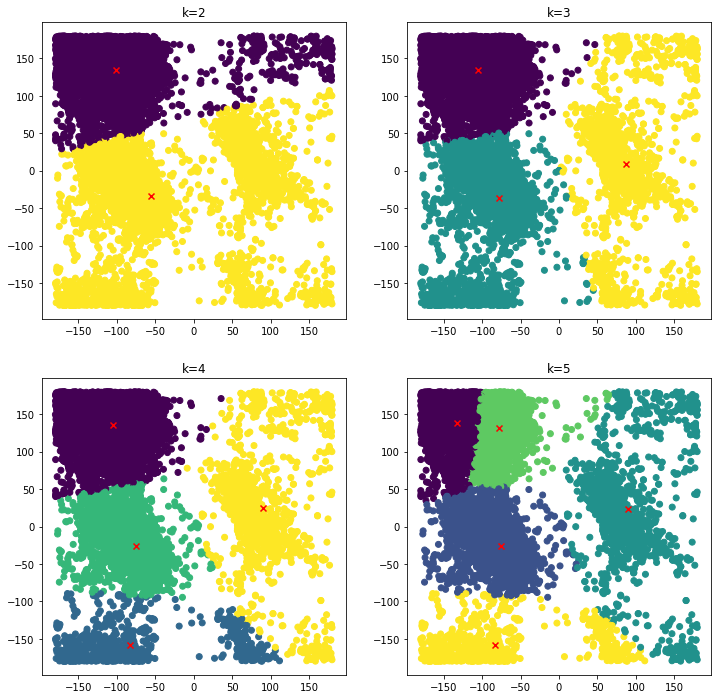

In [4]:
#some code from notebook kmeans_intro
#subplots from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
X = data.loc[:,['phi', 'psi']]
k1 = 2
k2 = 3
k3 = 4
k4 = 5
# Perform K-Means clustering    
# Specify the number of clusters (k) and fit the data X
kmeans1 = KMeans(n_clusters=k1, random_state=0).fit(X)
kmeans2 = KMeans(n_clusters=k2, random_state=0).fit(X)
kmeans3 = KMeans(n_clusters=k3, random_state=0).fit(X)
kmeans4 = KMeans(n_clusters=k4, random_state=0).fit(X)
# plot
fig, axs = plt.subplots(2, 2,figsize=(12,12))
axs[0, 0].scatter(x=X['phi'],y=X['psi'],c=kmeans1.predict(X),cmap='viridis')
axs[0, 0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='red', marker='x')
axs[0, 0].set_title("k={}".format(k1))
axs[0, 1].scatter(x=X['phi'],y=X['psi'],c=kmeans2.predict(X),cmap='viridis')
axs[0, 1].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='x')
axs[0, 1].set_title("k={}".format(k2))
axs[1, 0].scatter(x=X['phi'],y=X['psi'],c=kmeans3.predict(X),cmap='viridis')
axs[1, 0].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='red', marker='x')
axs[1, 0].set_title("k={}".format(k3))
axs[1, 1].scatter(x=X['phi'],y=X['psi'],c=kmeans4.predict(X),cmap='viridis')
axs[1, 1].scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], c='red', marker='x')
axs[1, 1].set_title("k={}".format(k4))
plt.show()

The best value for k looks to be k=4, since the separation of clusters in this plot is somewhat close to what a person would do manually.

### 2b. *Validate the clusters found with chosen value of K.*

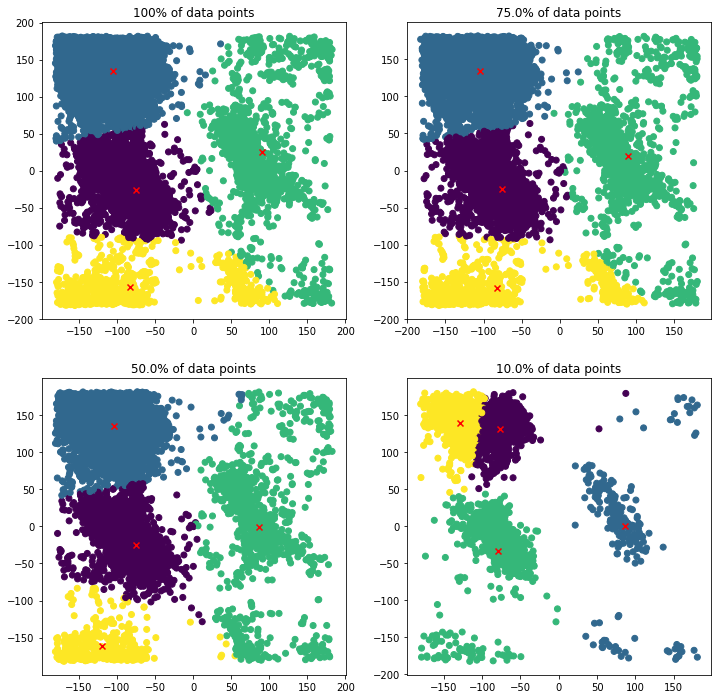

In [5]:
X = data.loc[:,['phi', 'psi']]
k = 4
p1 = 1
p2 = 0.75
p3 = 0.5
p4 = 0.1
X1, y = make_blobs(n_samples=int(len(X)*p1), centers=X)
X2, y = make_blobs(n_samples=int(len(X)*p2), centers=X)
X3, y = make_blobs(n_samples=int(len(X)*p3), centers=X)
X4, y = make_blobs(n_samples=int(len(X)*p4), centers=X)
# Perform K-Means clustering    
# Specify the number of clusters (k) and fit the data X
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(X2)
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(X3)
kmeans4 = KMeans(n_clusters=k, random_state=0).fit(X4)
# plot
fig, axs = plt.subplots(2, 2,figsize=(12,12))
axs[0, 0].scatter(x=X1[:,0],y=X1[:,1],c=kmeans1.predict(X1),cmap='viridis')
axs[0, 0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='red', marker='x')
axs[0, 0].set_title("{}% of data points".format(p1*100))
axs[0, 1].scatter(x=X2[:,0],y=X2[:,1],c=kmeans2.predict(X2),cmap='viridis')
axs[0, 1].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='x')
axs[0, 1].set_title("{}% of data points".format(p2*100))
axs[1, 0].scatter(x=X3[:,0],y=X3[:,1],c=kmeans3.predict(X3),cmap='viridis')
axs[1, 0].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='red', marker='x')
axs[1, 0].set_title("{}% of data points".format(p3*100))
axs[1, 1].scatter(x=X4[:,0],y=X4[:,1],c=kmeans4.predict(X4),cmap='viridis')
axs[1, 1].scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], c='red', marker='x')
axs[1, 1].set_title("{}% of data points".format(p4*100))
plt.show()

Since the cluster centers (red crosses) does not move very much when data is removed, this validates that the clusters found are stable.

### c. *Do the clusters seem resonable?*

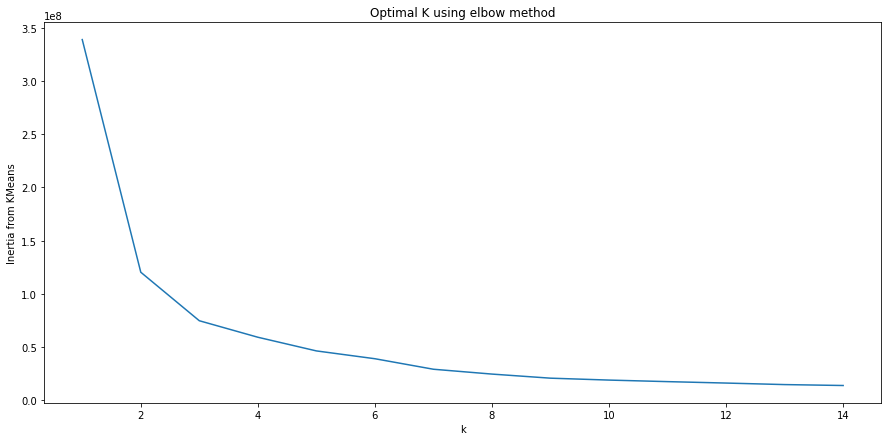

In [6]:
k = range(1,15)
kl = [KMeans(n_clusters=i,random_state=0).fit(X) for i in k]
mse = [x.inertia_ for x in kl]
plt.figure(figsize=(15,7))
plt.plot(k, mse, '-')
plt.xlabel('k')
plt.ylabel('Inertia from KMeans')
plt.title('Optimal K using elbow method')
plt.show()

From 2a and 2b the conclusion is that the value of k should be 4. The result in 2a is similar to how a human would cluster the data. When scaling the data the points are stable. By using the elbow method this result is further strengthened.

### d. *Changing the data for better results.*

With the knowledge that phi and psi are periodic comes the insight that it's possible to performe two shifts. This can be visualized as draging the plot downwards, so that 100 degrees on the psi-axis becomes the new starting point. The same can be done for phi. But instead of 100 degrees, the shift is performed by 360 degress. These two shifts are done because a better seperation of the clusters can be achieved.

In [7]:
data["shifted phi"] = [(i+360)%360 for i in data['phi']] # Create a new column called "shifted phi". Then, for every 
                                                              # phi value in the dataframe "data" we perform a shift by 360°  
                                                              # degrees. The modulo 360 is because of the periodic attributes 
                                                              # of phi and psi.

data["shifted psi"] = [(i+100)%360 for i in data['psi']] # Create a new column called "shifted psi". Then, for every 
                                                              # psi value in the dataframe "data" we perform a shift by 100° 
                                                              # degrees. The modulo 360 is because of the periodic attributes  
                                                              # of phi and psi.

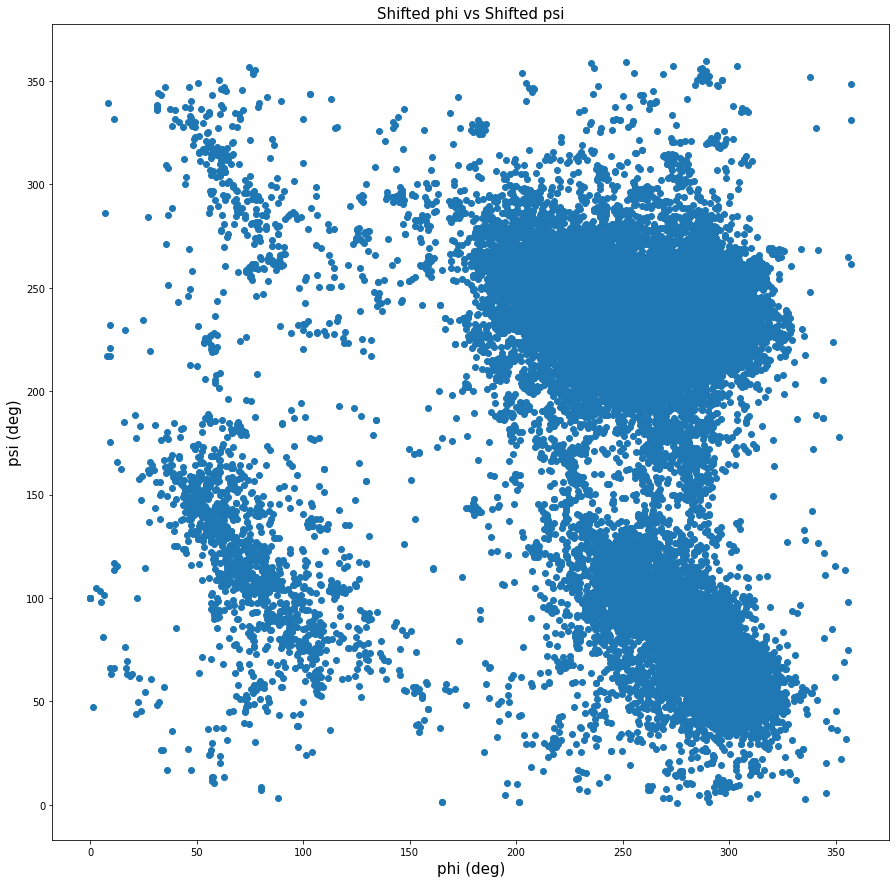

In [8]:
plt.figure(figsize=(15, 15))
plt.scatter(data['shifted phi'],data['shifted psi'])
plt.title('Shifted phi vs Shifted psi', fontsize = 15)
plt.xlabel('phi (deg)', fontsize = 15)
plt.ylabel('psi (deg)', fontsize = 15)
plt.show()

## 3. *Use the DBSCAN method to cluster phi and psi.*

Estimated number of clusters: 3
Estimated number of noise points: 182


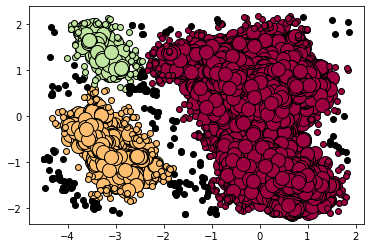

In [9]:
X = data.loc[:,['shifted phi', 'shifted psi']]
db_plot(X,0.38,70)

### a. *Motivate:*

### i. *The choice of minimum number of samples surrounding a corepoint.*

The choice of min_samples was made through trail and error. The choice of min_samples is highly dependent on the value of epsilon, since a high epsilon would include more "neighbours" than a low epsilon.

### ii. *The maximum distance between two samples belonging to the same neighbourhood.*

The choice of epsilon was also made through trail and error, since epsolion is highly dependant on the value of min_samples. If a high value on min_samples is chosen a larger area would need to be checked (large epsilon), and if a low value on min_samples is chosen a smaller area would need to be checked (small epsilon).

But the choice of min_samples and epsilon also depends on a lot of other factors, as for example: how the dataset looks, how many samples there are and the users preferences.

In this particular dataset the best clusters were found when using min_samples=70 and epsilon=0.38.

### b. *Highlight clusters and outliers. How many outliers are found?*

182 outliers are found.


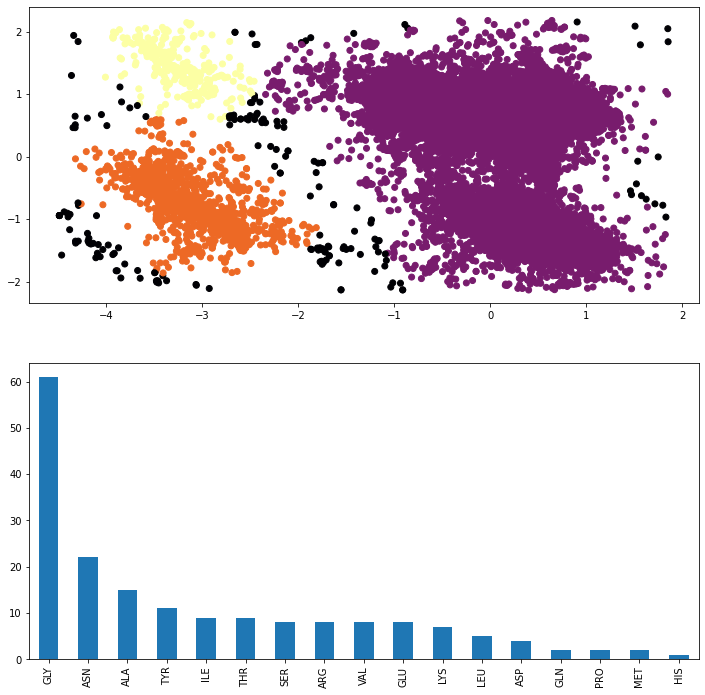

In [10]:
eps = 0.38
min_samples = 70
X = data.loc[:,['shifted phi', 'shifted psi']]
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
# outliers (noise)
labels = db.labels_
data['labels'] = list(labels)
noise = data[(data['labels'] == -1)]
n_noise_ = list(labels).count(-1)
print('{} outliers are found.'.format(n_noise_))
# plot
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12,12))
ax1.scatter(X[:,0],X[:,1],c=db.fit_predict(X),cmap='inferno')
bar = noise['residue name'].value_counts(sort=True).plot.bar()

GLY is the most frequently prominent amino acid residue among the outliers.

### c. *Compare the clustering methods DBSCAN and K-means.*

K-means and DBSCAN are two different algorithms for clustering. One apparent drawback with the K-means algorithm is that it ignores outliers and noise, which is something that the DBSCAN does not. The DBSCAN give each point a label, depending on what cluster it belongs to according to it's parameters. If a point does not qualify for a cluster it is given the "-1" label, indicating that this node is a noice. Because of this, the two plots have clusters looking a bit different where the K-means have more clusters and points and the DBSCAN have fewer cluster and also shows noice (based on choosen parameters).

### d. *Discuss the robustness of DBSCAN*

The model is not to be considered robust when there is a small change in the parameter epsilon. This is becuase it's highly dependent on min_samples. If there is a small change in min_samples however, the method can be considered robust since it does not affect the result much.

## 4 *How does PRO and GLY clusters differ from the general clusters.*

Estimated number of clusters: 2
Estimated number of noise points: 29


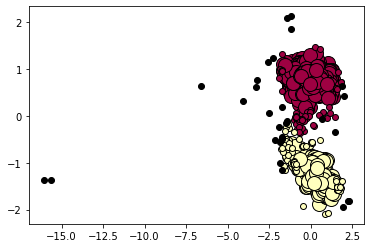

In [11]:
eps = 0.5 #increased eps and decreased min_samples to get better clusters
min_samples = 60
PRO = data[(data['residue name']=='PRO')]
X = PRO.loc[:,['shifted phi', 'shifted psi']]
db_plot(X,eps,min_samples)

The PRO data points are very concentrated on one location. When comparing this plot to the general clusters, it can be seen that the two clusters in this plot where both in the same cluster in the general clusters. However, when compairing it to the clusters from k-means it can be seen that the two clusters in this plot also lie in two separate clusters in k-means.

Estimated number of clusters: 4
Estimated number of noise points: 120


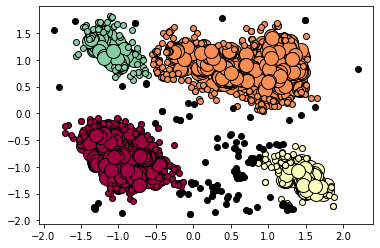

In [12]:
eps = 0.35 #decreased eps and increased min_samples to get better clusters
min_samples = 100
GLY = data[(data['residue name']=='GLY')]
X = GLY.loc[:,['shifted phi', 'shifted psi']]
db_plot(X,eps,min_samples)

The GLY data points, compared to PRO, are more spread out. When comparing this plot to the general clusters, it can be seen that the clusters are very similar. The only difference is that the big cluster in the general clusters have been divided into two clusters in this plot. But yet again, when compairing that to the k-means clusters we can see that the two clusters also lie in two separate clusters in k-means.